# Generative Adversial Networks
- Ian Goodfellow and colleagues in 2014.
- Two neural networks contest with each other in a game.
- Learns to generate new data with the same statistics as the training set

**Discriminator**
- a CNN (Supervised), image as input: 0 or 1 as output
- improves with time as generator generates more images

**Generator**
- a neural network, Noise as input: output is an image
- improves with time based on discriminator's feedback
- the moment it is able to fool discriminator, we withdraw and use this generator

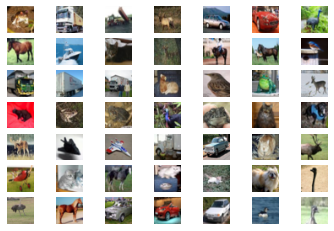

In [1]:
# loading and plotting the cifar10 dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot

# Load the images into memory
(trainX, trainy), (tetsX,testy)  = load_data()

# plot images from the training dataset
for i in range(49):
    # define subplot
    pyplot.subplot(7,7,1+i)
    # turnoff axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(trainX[i])
pyplot.show()

In [2]:
print(trainX.shape)

(50000, 32, 32, 3)


In [4]:
# Discriminator classifier
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU
from keras.utils.vis_utils import plot_model
import numpy as np

LeakyRelu better than Relu in GANs

In [25]:
def define_discriminator(in_shape = (32,32,3)):
    model = Sequential()
    # normal
    model.add(Conv2D(64, (3,3), padding = 'same', input_shape = in_shape))
    model.add(LeakyReLU(alpha = 0.2))
    # downsapmle (stride =2 by 2 [aadha hota jayega])
    model.add(Conv2D(128, (3,3), padding = 'same', strides = (2,2)))
    model.add(LeakyReLU(alpha = 0.2))
    # downsapmle
    model.add(Conv2D(128, (3,3), padding = 'same', strides = (2,2)))
    model.add(LeakyReLU(alpha = 0.2))
    # downsapmle
    model.add(Conv2D(256, (3,3), padding = 'same', strides = (2,2)))
    model.add(LeakyReLU(alpha = 0.2))
    # classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'sigmoid'))
    # compile model
    opt = Adam(lr = 0.0002, beta_1 = 0.5)
    model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics = ['accuracy'])
    return model

    
    

In [26]:
# define model 
model = define_discriminator()

# summarize the model
model.summary()
# plot the model
plot_model(model, to_file = 'discriminator_plot.png', show_layer_names = True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 4, 256)        

In [27]:
# we need to provide both real and fake data to the discriminator
def load_real_samples():
    # load cifar10
    (trainX,_),(_,_) = load_data()
    # convert unsigned ints to float
    X = trainX.astype('float32')
    # Scale from [0,255] to [-1,-1]---tanh use karne vale hain
    ## Downsample instead of maxpool---
    X = (X-127.5)/127.5
    return X

In [28]:
X = load_real_samples()
X.shape

(50000, 32, 32, 3)

In [29]:
# Select real samples
def generate_real_samples(dataset, n_samples):
    # chose random instances
    ix = np.random.randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = np.ones((n_samples, 1))
    return X, y

In [30]:
X, y = generate_real_samples(X,64)
print(X.shape)
print(y.shape)
print(y)

(64, 32, 32, 3)
(64, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [31]:
def generate_fake_samples(n_samples):
    # generate uniform random numbers in [0,1]
    X = np.random.rand(32*32*3*n_samples)
    # update to have the range [-1,-1]
    X = -1 + X * 2
    # reshape into a batch of color images
    X = X.reshape((n_samples, 32,32,3))
    # generate 'fake' class labels (0)
    y = np.zeros((n_samples,1))
    return X, y


In [32]:
X, y = generate_fake_samples(64)
print(X.shape)
print(y.shape)
print(y)

(64, 32, 32, 3)
(64, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


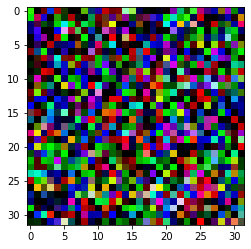

In [33]:
pyplot.imshow(X[0])

In [34]:
# real and fake mix nahi karna: two time weight updation in single epoch

def train_discriminator(model, dataset, n_iter = 20, n_batch = 128):
    half_batch = int(n_batch/ 2)
    # manually enumerate epochs
    for i in range(n_iter):
        # get randomly selected real samples
        X_real, y_real = generate_real_samples(dataset, half_batch)
        # update discriminator on real samples
        _, real_acc = model.train_on_batch(X_real, y_real)
        # generate Fake
        X_fake, y_fake = generate_fake_samples(half_batch)
        # update discriminator
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        # summarize performance
        print('>%d real = %.0f%% fake = %.0f%%' % (i+1, real_acc*100, fake_acc*100))


In [35]:
# example training

# define model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit model
train_discriminator(model, dataset)

>1 real = 33% fake = 0%
>2 real = 89% fake = 14%
>3 real = 91% fake = 39%
>4 real = 86% fake = 62%
>5 real = 89% fake = 94%
>6 real = 89% fake = 100%
>7 real = 98% fake = 100%
>8 real = 88% fake = 100%
>9 real = 95% fake = 100%
>10 real = 91% fake = 100%
>11 real = 97% fake = 100%
>12 real = 98% fake = 100%
>13 real = 98% fake = 100%
>14 real = 98% fake = 100%
>15 real = 98% fake = 100%
>16 real = 100% fake = 100%
>17 real = 97% fake = 100%
>18 real = 100% fake = 100%
>19 real = 100% fake = 100%
>20 real = 100% fake = 100%


# introduce Generator 
**increase difficulty of discriminator**

In [36]:
# Conv2dTranspose -----image ko upscale
from keras.models import Sequential
from keras.layers import Dense, Reshape, Conv2D, Conv2DTranspose, LeakyReLU
from keras.utils.vis_utils import plot_model

In [37]:
# noise from gaussian latent space performs better 
def define_generator(latent_dim):
    model = Sequential()
    # foundation for 4x4 image
    n_nodes = 256 *4 *4
    model.add(Dense(n_nodes, input_dim = latent_dim))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Reshape((4,4,256)))# 256 representation

    # upsample to 8x8
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha = 0.2))
    # upsample to 16x16
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha = 0.2))
    # upsample to 32 x 32 (OUTPUT)
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha = 0.2))
    # output layer
    model.add(Conv2D(3,(3,3), activation='tanh', padding='same'))
    return model

In [38]:
# define size of latent space
latent_dim = 100

# define generator model
model = define_generator(latent_dim)

# summarize the model
model.summary()

# plot the model
plot_model(model, to_file = 'generator_plot.ong', show_shapes = True, show_layer_names = True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 128)        524416    
 nspose)                                                         
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                            

In [39]:
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim*n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [40]:
x_input = generate_latent_points(100,64)
x_input.shape

(64, 100)

In [41]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create fake class labels
    y = np.zeros((n_samples, 1))
    return X, y

2/2 [==============================] - 1s 61ms/step


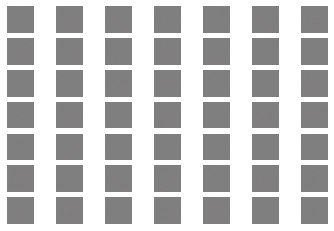

In [42]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# scale pixel values from [-1,1] to [0,1]
X = (X+1)/2.0
# plot the generated samples
for i in range(n_samples):
    #define subplot
    pyplot.subplot(7,7,1+i)
    # turn off axis labels
    pyplot.axis('off')
    # plot single image
    pyplot.imshow(X[i])
# show the figure
pyplot.show()

# Merging the two

In [43]:
# define the combined model
def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add discriminator
    model.add(d_model)
    # compile model
    opt = Adam(lr = 0.0002, beta_1 = 0.5)
    model.compile(loss = 'binary_crossentropy', optimizer=opt)
    return model

In [44]:
# size of largest space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the GAN
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file = 'gan_plot.png', show_shapes = True, show_layer_names = True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_8 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1,988,612


c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [45]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i])
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

In [46]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch+1)
	g_model.save(filename)

In [51]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs = 5, n_batch = 128):
    bat_per_epo = int(dataset.shape[0]/n_batch)
    half_batch = int(n_batch/2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = np.ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d1 = %.3f, d2=%.3f, g=%.3f' %
                  (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        # evaluate the model performance, sometimes
        if (i+1) % 1 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)
             

In [52]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs = 5, n_batch = 128)

2/2 [==============================] - 0s 90ms/step
>1, 1/390, d1 = 0.216, d2=0.635, g=7.101
2/2 [==============================] - 0s 101ms/step
>1, 2/390, d1 = 0.729, d2=0.021, g=4.614
2/2 [==============================] - 0s 100ms/step
>1, 3/390, d1 = 0.555, d2=0.384, g=1.750
2/2 [==============================] - 0s 92ms/step
>1, 4/390, d1 = 0.181, d2=0.587, g=1.788
2/2 [==============================] - 0s 85ms/step
>1, 5/390, d1 = 0.235, d2=0.292, g=2.332
2/2 [==============================] - 0s 87ms/step
>1, 6/390, d1 = 0.227, d2=0.183, g=2.363
2/2 [==============================] - 0s 92ms/step
>1, 7/390, d1 = 0.188, d2=0.335, g=2.266
2/2 [==============================] - 0s 95ms/step
>1, 8/390, d1 = 0.263, d2=0.702, g=1.868
2/2 [==============================] - 0s 98ms/step
>1, 9/390, d1 = 0.130, d2=0.880, g=2.648
2/2 [==============================] - 0s 86ms/step
>1, 10/390, d1 = 0.404, d2=0.120, g=3.373
2/2 [==============================] - 0s 89ms/step
>1, 11/390, d1 

KeyboardInterrupt: 